
![Imagen](itd.png)

# Analisis De Datos Masivos
## Introduccion A DataFrames En Pandas
    
## Nombre Del Docente
### Jose Gabriel Rodriguez Rivas
    
## Francisco javier Favela Najera 

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 
from matplotlib import colors

In [2]:
# code cell 2
# This should be a local path
dataset_path = 'Map-Crime_Incidents-Previous_Three_Months.csv'

# read the original dataset (in comma separated values format) into a DataFrame
SF = pd.read_csv(dataset_path)

In [3]:
SF['Month'] = SF['Date'].apply(lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:5]))

In [ ]:
SF.head()

In [4]:
del SF['IncidntNum']

In [5]:
SF.drop('Location',axis=1,inplace=True)

## pregunta de desafío: ¿Qué PdDistrict presentaba la mayoría de los incidentes de delitos informados? Proporcione los comandos de Python utilizados para respaldar su respuesta.

In [45]:
concatCategorias=SF['Category'].value_counts()
concatCategorias

LARCENY/THEFT                  8205
OTHER OFFENSES                 4004
NON-CRIMINAL                   3653
ASSAULT                        2518
VEHICLE THEFT                  1885
VANDALISM                      1611
WARRANTS                       1583
DRUG/NARCOTIC                  1292
BURGLARY                       1257
MISSING PERSON                 1135
ROBBERY                         862
SUSPICIOUS OCC                  682
FRAUD                           574
WEAPON LAWS                     322
TRESPASS                        259
DRUNKENNESS                     142
KIDNAPPING                      128
SEX OFFENSES, FORCIBLE          123
DRIVING UNDER THE INFLUENCE      93
FORGERY/COUNTERFEITING           88
DISORDERLY CONDUCT               69
RUNAWAY                          61
ARSON                            60
PROSTITUTION                     44
LIQUOR LAWS                      38
EMBEZZLEMENT                     19
SUICIDE                          14
FAMILY OFFENSES             

In [46]:
concatCategorias=SF['PdDistrict'].value_counts()
concatCategorias.head(1)

SOUTHERN    6185
Name: PdDistrict, dtype: int64

## Crear subconjuntos de datos y organizarlos en marcos de datos más pequeños

In [54]:
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimes

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day,PdDistrictCode
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31,1
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31,1
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31,1
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31,3
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31,4
5,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,00:01,CENTRAL,NONE,GRANT AV / SUTTER ST,-122.405403,37.789630,8,31,1
6,WARRANTS,WARRANT ARREST,Sunday,08/31/2014 07:00:00 AM +0000,18:51,RICHMOND,"ARREST, BOOKED",MARTIN LUTHER KING JR DR / 25TH AV,-122.482372,37.766770,8,31,6
7,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014 07:00:00 AM +0000,10:30,INGLESIDE,NONE,200.0 Block of ATHENS ST,-122.427017,37.723453,8,31,2
8,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,08/31/2014 07:00:00 AM +0000,16:30,CENTRAL,NONE,100.0 Block of JACKSON ST,-122.398859,37.796984,8,31,1
9,ROBBERY,ROBBERY OF A CHAIN STORE WITH BODILY FORCE,Sunday,08/31/2014 07:00:00 AM +0000,18:18,CENTRAL,NONE,300.0 Block of POWELL ST,-122.408334,37.787683,8,31,1


¿Cuántos incidentes de delitos hubo en agosto?

In [55]:
len(AugustCrimes)

9720

In [57]:
AugustCrimes = SF[ (SF['Category']  == 'LARCENY/THEFT') | 
                 (SF['Category']  == 'VEHICLE THEFT' ) ]
len(AugustCrimes)

10090

In [ ]:
# crimes agosto
crimenes0105=SF.query('Month== 8 and Day== 1')
crimenes0105.head()

In [ ]:
plt.plot(SF['X'],SF['Y'], 'b*')
plt.show()

In [29]:
pd_districts = np.unique(SF['PdDistrict'])
pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

In [9]:
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: pd_districts_levels[row])

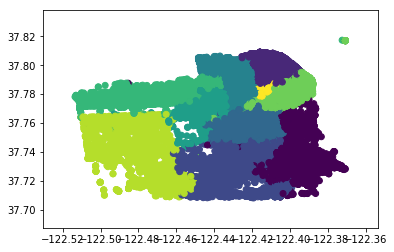

In [10]:
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show()

In [32]:
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)])

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


In [34]:
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)]))  
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

In [41]:
map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list(zip(SF['Y'], SF['X'], SF['PdDistrict']))

for el in obs[0:-1:plotEvery]:
    
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2],radius=10).add_to(map_osm)

In [42]:
map_osm